In [1]:
import numpy as np
import pandas as pd
import pickle

# Adjust Pandas DF View Options
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

# skip down until you see continue here

In [138]:
# lc = pickle.load(open('D:/ML Case Study/lending-club/lc_continuous.p','rb'))

In [15]:
lc.shape

(1285998, 96)

In [16]:
#Are there any NAs?
pd.isnull(lc).sum()
#nope!

id                                    0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
purpose                               0
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                            0


In [139]:
lc.term.head()
lc['term'] = lc['term'].str.split(' ').str[1]

In [140]:
lc['term']=pd.to_numeric(lc['term'])
lc['term'].dtype

dtype('int64')

In [19]:
lc.term.value_counts()

36    909462
60    376536
Name: term, dtype: int64

In [147]:
lc.dtypes.loc[lc.dtypes=='datetime64[ns]']

earliest_cr_line    datetime64[ns]
dtype: object

In [148]:
lc[['earliest_cr_line_year','earliest_cr_line_month','earliest_cr_line_day']] = lc.earliest_cr_line.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [153]:
lc.earliest_cr_line_day.value_counts()

01    1285998
Name: earliest_cr_line_day, dtype: int64

In [154]:
del lc['earliest_cr_line_day']
del lc['earliest_cr_line']

In [155]:
import calendar

d = dict((v,k) for k,v in enumerate(calendar.month_abbr))

In [156]:
lc['last_credit_pull_month']=lc.last_credit_pull_d.str.split('-').str[0]

In [157]:
lc['last_credit_pull_year']=lc.last_credit_pull_d.str.split('-').str[1]

In [27]:
lc.last_credit_pull_month = lc.last_credit_pull_month.map(d)

In [28]:
del lc['last_credit_pull_d']

Removed columns that had identical relationships to the analysis in question (E.g. funded_amnt and funded_amnt_inv as they are always the same as loan_amt)

In [29]:
#These are all the same. 
# lc[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
0,15000.0,15000.0,15000.0
1,10400.0,10400.0,10400.0
2,21425.0,21425.0,21425.0
3,12800.0,12800.0,12800.0
5,9600.0,9600.0,9600.0
7,16000.0,16000.0,16000.0
8,23325.0,23325.0,23325.0
9,5250.0,5250.0,5250.0
10,10000.0,10000.0,10000.0
11,12975.0,12975.0,12975.0


In [141]:
#Drop the duplicates.
del lc['funded_amnt']
del lc['funded_amnt_inv']

In [31]:
#Break these out
lc['sub_grade'].head()

0    C1
1    A3
2    D1
3    D4
5    C3
Name: sub_grade, dtype: object

In [32]:
# lc['sub_grade'] = lc['sub_grade'].map(lambda x: int(x.lstrip('ABCDEFG')))

In [33]:
lc.initial_list_status.value_counts()

w    822678
f    463320
Name: initial_list_status, dtype: int64

In [142]:
lc.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
  

In [35]:
#pickle.dump(lc, open('D:/ML Case Study/lending-club/lc_continuous_1.p','wb'))

# Continue Here

In [125]:
lc1 = pickle.load(open('D:/ML Case Study/lending-club/lc_continuous_1.p','rb'))

In [126]:
#Determine if variables are continuous or categorical:

categorical = []
continuous = []

for col in lc1.columns.tolist():
    try:
        lc1[col].astype(float)
    except:
        categorical.append(col)
        
continuous = [x for x in lc1.columns.tolist() if x not in categorical]

In [127]:
# get continuous variables that should be categorical
print(categorical)
# remove dates from categorical
#not_continuous = ['id','last_credit_pull_month', 'last_credit_pull_year', 'earliest_cr_line_year', 'earliest_cr_line_month', 'term', 'sec_app_flag']

#
not_continuous = ['id', 'sec_app_flag','last_credit_pull_month', 'last_credit_pull_year', 'earliest_cr_line_year',
                  'earliest_cr_line_month', 'issue_month', 'issue_year', 'term', 'sub_grade']
dates = ['last_credit_pull_month', 'last_credit_pull_year', 'earliest_cr_line_year', 'earliest_cr_line_month', 'issue_month', 'issue_year']

#Extract the Y variable and set it aside. 
int_rates = lc1[['int_rate']]
# Remove dates from categorical listing
categorical = [x for x in categorical if x not in dates]

# remove categorical from continuos listing
continuous = [x for x in continuous if x not in not_continuous]
continuous = [x for x in continuous if x not in ['int_rate', 'total_rec_int']]
# add categorical variables misclassified as continuous
categorical.extend(not_continuous)

['grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag', 'mths_since_recent_bc_cat', 'mo_sin_old_il_acct_cat', 'mths_since_recent_inq_cat', 'mths_since_last_delinq_cat', 'mths_since_rcnt_il_cat', 'mths_since_recent_revol_delinq_cat', 'mths_since_last_major_derog_cat', 'mths_since_recent_bc_dlq_cat', 'mths_since_last_record_cat']


In [128]:
print('Categorical Variables:')
print(categorical)
print('---------------\n')
print('Continuous Variables')
print(continuous)



Categorical Variables:
['grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag', 'mths_since_recent_bc_cat', 'mo_sin_old_il_acct_cat', 'mths_since_recent_inq_cat', 'mths_since_last_delinq_cat', 'mths_since_rcnt_il_cat', 'mths_since_recent_revol_delinq_cat', 'mths_since_last_major_derog_cat', 'mths_since_recent_bc_dlq_cat', 'mths_since_last_record_cat', 'id', 'sec_app_flag', 'last_credit_pull_month', 'last_credit_pull_year', 'earliest_cr_line_year', 'earliest_cr_line_month', 'issue_month', 'issue_year', 'term', 'sub_grade']
---------------

Continuous Variables
['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_f

In [118]:
# continuous = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
# 'total_rec_int', 'last_fico_range_high', 'annual_inc_final', 'earliest_cr_line_months', 'emp_length_floats', 'average_fico', 'dti_final', 'chargeoff_within_12_mths',
#              'last_pymnt_amnt', 'num_il_tl' ]

In [119]:
# categorical = ['grade', 'loan_status', 'addr_state', 'issue_d', 'initial_list_status', 'last_credit_pull_year', 'verification_status', 'sub_grade']

In [120]:
# out_prncp, out_prncp_inv, acc_now_delinq 

## find categorical variables with excessive number of categories

In [129]:
remove_cat = ['id','title','emp_title','zip_code', 'issue_month', 'issue_year', 'last_credit_pull_d', 'int_rate'] #'issue_d' for example
# Remove categories with an excessive number of unique categories from the categorical listing
categorical = [x for x in categorical if x not in remove_cat]
continuous  = [i for i in continuous if i not in remove_cat]

In [130]:
for cat in categorical:
    print(cat ,' : ', lc1[cat].nunique())

grade  :  7
home_ownership  :  6
verification_status  :  3
issue_d  :  62
loan_status  :  7
purpose  :  14
addr_state  :  51
initial_list_status  :  2
application_type  :  2
disbursement_method  :  2
debt_settlement_flag  :  2
mths_since_recent_bc_cat  :  3
mo_sin_old_il_acct_cat  :  4
mths_since_recent_inq_cat  :  4
mths_since_last_delinq_cat  :  4
mths_since_rcnt_il_cat  :  3
mths_since_recent_revol_delinq_cat  :  4
mths_since_last_major_derog_cat  :  4
mths_since_recent_bc_dlq_cat  :  4
mths_since_last_record_cat  :  4
sec_app_flag  :  2
last_credit_pull_month  :  12
last_credit_pull_year  :  6
earliest_cr_line_year  :  72
earliest_cr_line_month  :  12
term  :  2
sub_grade  :  5


In [131]:
categorical
# continuous
[print(x) for x in continuous if x in ['int_rate']]

[]

In [132]:
lc1 = lc1[continuous+categorical+['int_rate']]
lc = lc1

In [55]:
# lc = lc1[['grade', 'sub_grade', 'issue_d', 'int_rate']]

In [75]:
lc.head(10)

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sec_app_fico_best,annual_inc_final,earliest_cr_line_months,emp_length_floats,average_fico,dti_final,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag,mths_since_recent_bc_cat,mo_sin_old_il_acct_cat,mths_since_recent_inq_cat,mths_since_last_delinq_cat,mths_since_rcnt_il_cat,mths_since_recent_revol_delinq_cat,mths_since_last_major_derog_cat,mths_since_recent_bc_dlq_cat,mths_since_last_record_cat,sec_app_flag,last_credit_pull_month,last_credit_pull_year,earliest_cr_line_year,earliest_cr_line_month,term,int_rate
0,15000.0,336.64,78000.0,12.03,0.0,0.0,6.0,0.0,138008.0,29.0,17.0,0.00,0.00,17392.37,17392.37,15000.00,0.0,0.00,0.0000,12017.81,684.0,680.0,0.0,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,244.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,0,78000.0,278,10.0,752.0,12.03,RENT,Source Verified,Dec-2014,Fully Paid,debt_consolidation,VA,w,Individual,Cash,N,<50,0-150,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,0,11,2017,1994,08,60,12.39
1,10400.0,321.08,58000.0,14.92,0.0,2.0,17.0,0.0,6133.0,31.6,36.0,0.00,0.00,6611.69,6611.69,5217.75,0.0,521.27,93.8286,321.08,564.0,560.0,0.0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,290.0,1.0,1.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0,58000.0,337,8.0,712.0,14.92,MORTGAGE,Not Verified,Dec-2014,Charged Off,credit_card,CA,w,Individual,Cash,N,<50,0-150,0-5,0-50,Not Reported,0-50,50-75,0-50,Not Reported,0,2,2017,1989,09,36,6.99
2,21425.0,516.36,63800.0,18.49,0.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.00,0.00,25512.20,25512.20,21425.00,0.0,0.00,0.0000,17813.19,704.0,700.0,0.0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,136.0,7.0,7.0,0.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0,63800.0,170,6.0,687.0,18.49,RENT,Source Verified,Dec-2014,Fully Paid,credit_card,MO,w,Individual,Cash,N,<50,0-150,5-15,50-75,Not Reported,50-75,50-75,50-75,Not Reported,0,12,2017,2003,08,60,15.59
3,12800.0,319.08,125000.0,8.31,1.0,0.0,8.0,0.0,5753.0,100.9,13.0,6673.54,6673.54,11207.67,11207.67,6126.46,0.0,0.00,0.0000,319.08,629.0,625.0,0.0,0.0,0.0,261815.0,5700.0,2.0,32727.0,0.0,103.2,0.0,0.0,170.0,21.0,16.0,5.0,1.0,3.0,5.0,3.0,5.0,1.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,0.0,76.9,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0,0,125000.0,204,10.0,667.0,8.31,MORTGAGE,Verified,Dec-2014,Current,car,CA,w,Individual,Cash,N,<50,0-150,0-5,0-50,Not Reported,0-50,0-50,0-50,Not Reported,0,12,2017,2000,10,60,17.14
5,9600.0,326.53,69000.0,25.81,0.0,0.0,12.0,0.0,16388.0,59.4,44.0,0.00,0.00,9973.43,9973.43,9600.00,0.0,0.00,0.0000,9338.58,724.0,720.0,0.0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,265.0,23.0,3.0,0.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0,69000.0,299,10.0,682.0,25.81,RENT,Source Verified,De

In [120]:
lc.shape

(1285998, 91)

In [127]:
# lc.drop('int_rate', axis = 1)

In [133]:
def data_type_preprocessing(df,y, var_type = 'continuous',
                            continuous_list = None, categorical_list = None, categorical_only= False, seed = None):
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.cross_validation import train_test_split
    ''' The following function will preprocess the data and create a train test split.
    It will be able to handle dataframes that are all categorical, all continuous, or mixed.
    it will create dummies for categorical variables. It will normalize continous variables.
    it will also create a train test split. For mixed dataframes it will return the indexes of 
    the continuous and categorical variables.
    
    var_type
    --------
    var_type = 'continuous' (by default. Indicates only continous variables in the dataframe)
    var_type = 'categorical' ('Indicates only a categorical dataframe)
    var_type = 'Mixed ('Indicates both categorical and continous variables present. 
                        Requires both categorical list, and continuous lists.)
    '''
    
    #get variable names from the function
    #------------------------------------
    
    #get the y col
    y_col = y
    
    #create the y array 
    y = np.array(df[y].astype(str))
    
    """ Determine the type variables we are working with and 
    process accrodingly"""
    
    if var_type == 'mixed':
        #get categorical & continuous variables
        cont = continuous_list
        cat = categorical_list
        
        #subset continuous
        cont_df = df[cont]
        
        #get the length of continuous and categorical to slice arrays
        split_position = len(cont)
        
        #get dummies for categorical variables
        cat_df = pd.get_dummies(df[cat].astype(str))
    
        #recreate the dataframe with dummies
        X = pd.merge(cont_df,cat_df, how = 'left', left_index=True, right_index = True)
        
    elif var_type == 'categorical':
        #create a dataframe of dummy variables that do not include y
        dummy_list=[]
        for i in categorical_list:
            dummy_list.append(pd.get_dummies(lc[i]))
        X=pd.concat(dummy_list, axis=1)
        
    elif var_type == 'continuous':
        X = df[[col for col in df.columns if col not in y_col]]
    
    
    # Get column names
    col_names = X.columns
    X = np.array(X)
    
    # Create the train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = seed)
    
    
    #preprocess continuous variables
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
        
    if var_type == 'mixed':
        #idenify the array index of categorical and continuous columns
        cont_idx = [i for i in range(split_position)]
        cat_idx = [i for i in range(split_position, col_names.shape[0])] 
        return X_train, X_test, y_train, y_test, col_names
    else:
        return X_train, X_test, y_train, y_test, col_names

In [134]:
X_train, X_test, y_train, y_test, col_names = data_type_preprocessing(lc,
                                                                      y = 'int_rate', 
                                                                      var_type = 'mixed',
                                                                     continuous_list = continuous, #contiuous
                                                                      categorical_only= True,
                                                                      categorical_list = categorical, #categorical
                                                                      seed = 42)

In [135]:
#Make dataframe of the X space:
X_train_df = pd.DataFrame(X_train, columns = col_names)
X_train_df.head()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sec_app_fico_best,annual_inc_final,earliest_cr_line_months,emp_length_floats,average_fico,dti_final,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y,mths_since_recent_bc_cat_50+,mths_since_recent_bc_cat_<50,mths_since_recent_bc_cat_Not Reported,mo_sin_old_il_acct_cat_0-150,mo_sin_old_il_acct_cat_150-200,mo_sin_old_il_acct_cat_200+,mo_sin_old_il_acct_cat_Not Reported,mths_since_recent_inq_cat_0-5,mths_since_recent_inq_cat_15+,mths_since_recent_inq_cat_5-15,mths_since_recen

In [79]:
#Make sure that int_rate is not in the Xs. 
[print(i) for i in col_names if 'int_rate' in i]

[]

# Neural Network Architecture

In [46]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras import regularizers
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
import keras
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [47]:
def NN_overfit_plt(model, plt_param = 'loss'):
    """
    The following function will create a plot comparing training and validation
    for a neural network. It will plot either the accuracy or the loss as indicated
    in by the plt_param argument. 
    
    """
    if plt_param == 'loss':
        trn = 'loss'
        val = 'val_loss'
    else:
        trn = 'loss'
        val = 'val_loss'
    
    # Get Training and Validation Loss
    training = model.history[trn]
    validation = model.history[val]
    
    # Determine the number of epochs
    epochs = range(1, len(training) + 1)
    
    print(epochs)
    
    # create the plot
    plt.plot(epochs, training, 'bo', label='Training '+ plt_param)
    plt.plot(epochs, validation, 'b', label='Validation '+ plt_param)
    plt.title('Training and validation '+ plt_param)
    plt.xlabel('Epochs')
    plt.ylabel(plt_param)
    plt.legend()
    plt.show()
    
def validation_plots(model):
    plt.subplots(figsize=(10,4))
    plt.subplot(1, 2, 1)
    NN_overfit_plt(model, plt_param = 'loss')
#     plt.subplot(1, 2, 2)
#     NN_overfit_plt(model, plt_param = 'mean_squared_error')
#     plt.tight_layout()
    plt.show()

In [100]:
#New function to create the model. 
from keras.layers.advanced_activations import PReLU
counter=0
def iter_ANN_prelu(inputs = X_train.shape[1],
             lasso_p = 0,
             ridge_p = 0, #0
             nodes = 20, #25 best so far
             do = [False, 0], #.1 best so far
             prelu_layers = 2,
             non_prelu_layers = 0, #3 best so far
             layer_activation = 'relu',
             wgt_init = 'uniform',
             output_activation = None, 
             optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = None):
#     counter+=1
    # Set up Sequential ANN and Input Layer
    model = Sequential()
    model.add(Dense(nodes, input_shape=(inputs,)))
    #Define the 'prelu'
    act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
    
    for i in range(prelu_layers):
        model.add(Dense(nodes, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p), kernel_initializer=wgt_init))
        #add PreLU
        model.add(act)
        if do[0] == True:
            model.add(Dropout(do[1]))
        
    for i in range(non_prelu_layers):                 
        model.add(Dense(nodes, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p), kernel_initializer=wgt_init,
                 activation = layer_activation))
        if do[0] == True:
            model.add(Dropout(do[1]))
    
    # Set Up Output Layer 
    #model.add(Flatten())
    model.add(Dense(1, activation = output_activation))
    
    model.compile(optimizer = optimizer,
                           loss = loss)
    print("Counter = "+ str(counter)+"\nlasso_p = "+ str(lasso_p) +"\nridge_p = "+str(ridge_p) + "\nnodes = "+ str(nodes)+ "\ndo = "+ str(do)+"\nprelu_layers = "+str(prelu_layers))
    print("non_prelu_layers = " + str(non_prelu_layers) + "\nlayer_activation = " +str(layer_activation))         
    print("\nwgt_init = "+str(wgt_init) + "\noutput_activation = "+str(output_activation)+ "\nloss = "+str(loss)) 
    return model

In [101]:
#Apply the model. 
import tensorflow as tf
from keras.backend import tensorflow_backend as K

with tf.Session(config=tf.ConfigProto(
                    intra_op_parallelism_threads=6)) as sess:
    K.set_session(sess)

model_prelu = iter_ANN_prelu()
model_prelu_hist = model_prelu.fit(X_train, 
                       y_train,
                       epochs=15,
                       batch_size = 128,
                       validation_data=(X_test, y_test))

C:\Users\thomb\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`


Counter = 0
lasso_p = 0
ridge_p = 0
nodes = 20
do = [False, 0]
prelu_layers = 2
non_prelu_layers = 0
layer_activation = relu
layer_activation = relu
wgt_init = uniform
output_activation = None
loss = mean_squared_error
Train on 1157398 samples, validate on 128600 samples
Epoch 1/15
1157398/1157398 [==============================] - 51s 44us/step - loss: 7.9767 - val_loss: 4.1397
Epoch 2/15
1157398/1157398 [==============================] - 41s 35us/step - loss: 2.3353 - val_loss: 1.4005
Epoch 3/15
1157398/1157398 [==============================] - 38s 33us/step - loss: 1.3237 - val_loss: 1.3560
Epoch 4/15
1157398/1157398 [==============================] - 37s 32us/step - loss: 0.9407 - val_loss: 0.9502
Epoch 5/15
1157398/1157398 [==============================] - 50s 43us/step - loss: 0.7772 - val_loss: 0.7535
Epoch 6/15
1157398/1157398 [==============================] - 50s 44us/step - loss: 0.6967 - val_loss: 0.6639
Epoch 7/15
1157398/1157398 [==============================] - 50s 43

In [102]:
# Extracing r-squared value for a given model. 
y_prelu_pred=model_prelu.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_prelu_pred)

0.98394015031319637

In [119]:
print(X_train.shape)

(1157398, 356)


range(1, 16)


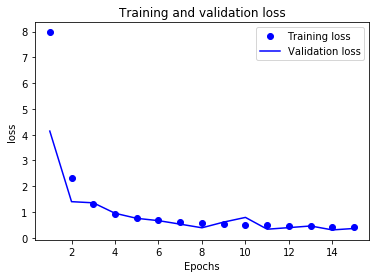

In [104]:
NN_overfit_plt(model_prelu_hist)

range(1, 16)


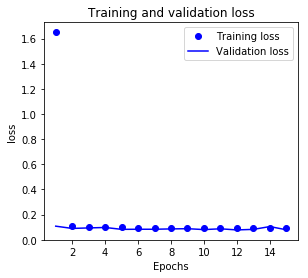

In [140]:
validation_plots(model_prelu_hist)

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
linreg = LinearRegression()

In [107]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
linreg_preds=linreg.predict(X_test)

In [109]:
print(mean_squared_error(y_test, linreg_preds))
print(r2_score(y_test, linreg_preds))

5.56273177874
0.752221335886


In [136]:
#Linear regression with grade and sub-grade
linreg1 = LinearRegression()

In [137]:
linreg1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
linreg_preds=linreg1.predict(X_test)

In [139]:
print(mean_squared_error(y_test, linreg_preds))
print(r2_score(y_test, linreg_preds))

0.477341075079
0.978737976481


# Adding iterable functionality

C:\Users\thomb\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`


Counter = 0
lasso_p = 0
ridge_p = 0
nodes = 20
do = [False, 0]
prelu_layers = 0
non_prelu_layers = 2
layer_activation = relu
layer_activation = relu
wgt_init = uniform
output_activation = None
loss = mean_squared_error
Model, L1 =  64
Train on 1157398 samples, validate on 128600 samples
Epoch 1/15
1157398/1157398 [==============================] - 49s 42us/step - loss: 6.2573 - val_loss: 2.0590
Epoch 2/15
1157398/1157398 [==============================] - 47s 41us/step - loss: 1.4648 - val_loss: 1.6352
Epoch 3/15
1157398/1157398 [==============================] - 42s 36us/step - loss: 1.0821 - val_loss: 0.8724
Epoch 4/15
1157398/1157398 [==============================] - 44s 38us/step - loss: 0.8865 - val_loss: 0.7868
Epoch 5/15
1157398/1157398 [==============================] - 44s 38us/step - loss: 0.7878 - val_loss: 0.7473
Epoch 6/15
1157398/1157398 [==============================] - 44s 38us/step - loss: 0.6959 - val_loss: 0.7243
Epoch 7/15
1157398/1157398 [========================

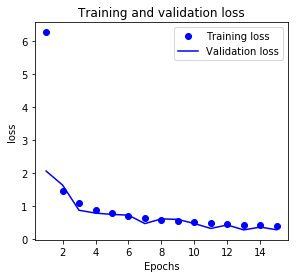




Counter = 0
lasso_p = 0
ridge_p = 0
nodes = 20
do = [False, 0]
prelu_layers = 0
non_prelu_layers = 2
layer_activation = relu
layer_activation = relu
wgt_init = uniform
output_activation = None
loss = mean_squared_error
Model, L1 =  128
Train on 1157398 samples, validate on 128600 samples
Epoch 1/15
1157398/1157398 [==============================] - 36s 31us/step - loss: 7.9526 - val_loss: 4.0237
Epoch 2/15
1157398/1157398 [==============================] - 34s 29us/step - loss: 3.0150 - val_loss: 2.7504
Epoch 3/15
1157398/1157398 [==============================] - 28s 24us/step - loss: 2.6722 - val_loss: 2.8494
Epoch 4/15
1157398/1157398 [==============================] - 26s 22us/step - loss: 2.5741 - val_loss: 2.4204
Epoch 5/15
1157398/1157398 [==============================] - 26s 23us/step - loss: 1.8820 - val_loss: 1.5177
Epoch 6/15
1157398/1157398 [==============================] - 25s 22us/step - loss: 1.0607 - val_loss: 1.0846
Epoch 7/15
1157398/1157398 [====================

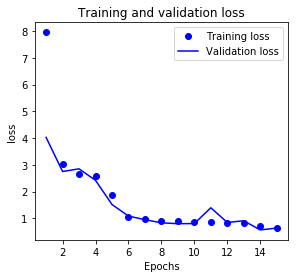




Counter = 0
lasso_p = 0
ridge_p = 0
nodes = 20
do = [False, 0]
prelu_layers = 0
non_prelu_layers = 2
layer_activation = relu
layer_activation = relu
wgt_init = uniform
output_activation = None
loss = mean_squared_error
Model, L1 =  256
Train on 1157398 samples, validate on 128600 samples
Epoch 1/15
1157398/1157398 [==============================] - 15s 13us/step - loss: 9.9445 - val_loss: 4.8434
Epoch 2/15
1157398/1157398 [==============================] - 20s 17us/step - loss: 2.8585 - val_loss: 2.3414
Epoch 3/15
1157398/1157398 [==============================] - 18s 16us/step - loss: 1.2792 - val_loss: 1.8257
Epoch 4/15
1157398/1157398 [==============================] - 19s 16us/step - loss: 0.8964 - val_loss: 0.7637
Epoch 5/15
1157398/1157398 [==============================] - 19s 16us/step - loss: 0.7301 - val_loss: 1.8205
Epoch 6/15
1157398/1157398 [==============================] - 19s 16us/step - loss: 0.6546 - val_loss: 0.4694
Epoch 7/15
1157398/1157398 [====================

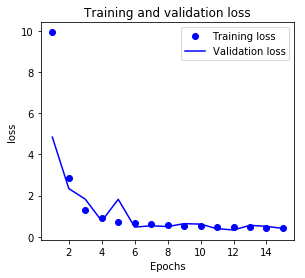




Counter = 0
lasso_p = 0
ridge_p = 0
nodes = 20
do = [False, 0]
prelu_layers = 0
non_prelu_layers = 2
layer_activation = relu
layer_activation = relu
wgt_init = uniform
output_activation = None
loss = mean_squared_error
Model, L1 =  512
Train on 1157398 samples, validate on 128600 samples
Epoch 1/15
1157398/1157398 [==============================] - 15s 13us/step - loss: 13.8073 - val_loss: 7.7252
Epoch 2/15
1157398/1157398 [==============================] - 15s 13us/step - loss: 5.5986 - val_loss: 4.0683
Epoch 3/15
1157398/1157398 [==============================] - 17s 15us/step - loss: 2.7895 - val_loss: 1.5087
Epoch 4/15
1157398/1157398 [==============================] - 19s 16us/step - loss: 1.2491 - val_loss: 1.0202
Epoch 5/15
1157398/1157398 [==============================] - 19s 16us/step - loss: 0.9296 - val_loss: 0.8497
Epoch 6/15
1157398/1157398 [==============================] - 19s 17us/step - loss: 0.7852 - val_loss: 0.6620
Epoch 7/15
1157398/1157398 [===================

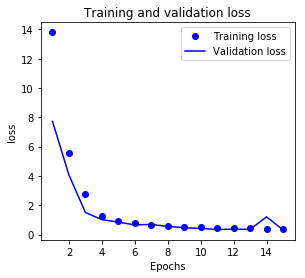

In [115]:
#Adding Steve's iterable thingy:

model_dict = {}

l1 = [0, 0, 0, 0]
l2 = [0, 0, 0, 0]
DO = [[False, 0],[False, 0],[False, 0],[False, 0]]
batch_size = [64, 128, 256, 512]

model_list = []
for i, value in enumerate(batch_size):
    model = iter_ANN_prelu(inputs = X_train.shape[1],
             lasso_p = 0,
             ridge_p = 0,
             nodes = 20,
             do = [False, 0],
             prelu_layers = 0,
             non_prelu_layers = 2,
             layer_activation = 'relu',
             wgt_init = 'uniform',
             output_activation = None,
             optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = None)
    
    print('Model, L1 = ',value)
    model_dict['model' + str(i)] = model.fit(X_train, 
                                             y_train,
                                             epochs=15,
                                             batch_size = value,  #128 is the best so far...
                                             validation_data=(X_test, y_test))
    from sklearn.metrics import r2_score
    y_prelu_pred=model.predict(X_test)
    model_dict['model'+ str(i)+'_R2'] = r2_score(y_test, y_prelu_pred)
    model_list.append('model'+str(i))
    print(r2_score(y_test, y_prelu_pred))
    validation_plots(model_dict['model' + str(i)])
    print('\n\n')

In [ ]:
#How to save a model
# model.save('model1.h5')
# from keras.models import load_model
# model = load_model('model1.h5')

# Making a dataframe of results

In [122]:
#Check out the best model:

for i, key in enumerate(model_list):
    l1_val =  l1[i]
    l2_val =  l2[i]
    do_val =  DO[i][1]
    
    #  Validation Accuracy
    min_val = min(model_dict[key].history['val_loss'])
    max_val = max(model_dict[key].history['val_loss'])
    
    dif = max_val - min_val
    high_epoch = np.argmin(np.array(model_dict[key].history['val_loss']))

    if i == 0:
        vals = np.array([[l1_val, l2_val, do_val,min_val, max_val, dif, high_epoch, model_dict['model'+ str(i)+'_R2']]])
    else:
        vals = np.vstack((vals,np.array([[l1_val, l2_val, do_val,min_val, max_val, dif, high_epoch, model_dict['model'+ str(i)+'_R2']]])))
    
cols = ['l1', 'l2','DO','MIN_Loss','MAX_loss','DIFF','LOW_EPOCH', 'R_Squared']
nn_metrics = pd.DataFrame(vals, columns = cols)
nn_metrics

,l1,l2,DO,MIN_Loss,MAX_loss,DIFF,LOW_EPOCH,R_Squared
0,0.0,0.0,0.0,0.278204,2.059027,1.780823,12.0,0.987420
1,0.0,0.0,0.0,0.568007,4.023720,3.455713,13.0,0.971683
2,0.0,0.0,0.0,0.332025,4.843430,4.511406,11.0,0.982078
3,0.0,0.0,0.0,0.318889,7.725208,7.406319,14.0,0.985796


In [123]:
nn_metrics=pd.DataFrame(nn_metrics)
nn_metrics['RMSE']=[np.sqrt(nn_metrics['MIN_Loss'][0]), np.sqrt(nn_metrics['MIN_Loss'][1]), np.sqrt(nn_metrics['MIN_Loss'][2]), np.sqrt(nn_metrics['MIN_Loss'][3])]
nn_metrics['DO'] = 0
nn_metrics

,l1,l2,DO,MIN_Loss,MAX_loss,DIFF,LOW_EPOCH,R_Squared,RMSE
0,0.0,0.0,0,0.278204,2.059027,1.780823,12.0,0.987420,0.527450
1,0.0,0.0,0,0.568007,4.023720,3.455713,13.0,0.971683,0.753663
2,0.0,0.0,0,0.332025,4.843430,4.511406,11.0,0.982078,0.576216
3,0.0,0.0,0,0.318889,7.725208,7.406319,14.0,0.985796,0.564702


In [124]:
nn_metrics=pd.DataFrame(nn_metrics)
nn_metrics['Batch_Size']=[64, 128, 256, 512]
# nn_metrics['DO'] = 0
nn_metrics

,l1,l2,DO,MIN_Loss,MAX_loss,DIFF,LOW_EPOCH,R_Squared,RMSE,Batch_Size
0,0.0,0.0,0,0.278204,2.059027,1.780823,12.0,0.987420,0.527450,64
1,0.0,0.0,0,0.568007,4.023720,3.455713,13.0,0.971683,0.753663,128
2,0.0,0.0,0,0.332025,4.843430,4.511406,11.0,0.982078,0.576216,256
3,0.0,0.0,0,0.318889,7.725208,7.406319,14.0,0.985796,0.564702,512


Model 0


l1              0.000000
l2              0.000000
DO              0.000000
MIN_Loss        0.310210
MAX_loss        7.668468
DIFF            7.358258
LOW_EPOCH      13.000000
R_Squared       0.982506
RMSE            0.556965
Batch_Size    512.000000
Name: 0, dtype: float64

range(1, 16)


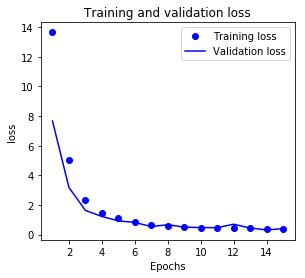


_____________________________________________________________________________________

Model 1


l1              0.000000
l2              0.000000
DO              0.100000
MIN_Loss        2.524531
MAX_loss        7.854281
DIFF            5.329749
LOW_EPOCH       9.000000
R_Squared       0.884302
RMSE            1.588877
Batch_Size    512.000000
Name: 1, dtype: float64

range(1, 16)


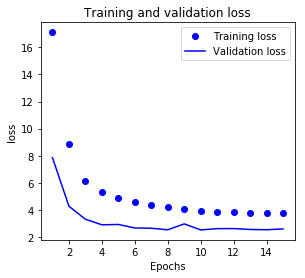


_____________________________________________________________________________________

Model 2


l1              0.000000
l2              0.000000
DO              0.250000
MIN_Loss        1.639495
MAX_loss        8.192676
DIFF            6.553180
LOW_EPOCH      12.000000
R_Squared       0.921853
RMSE            1.280428
Batch_Size    512.000000
Name: 2, dtype: float64

range(1, 16)


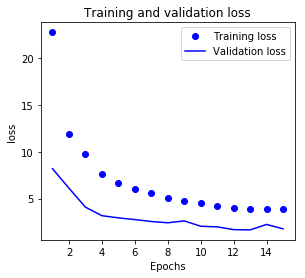


_____________________________________________________________________________________

Model 3


l1              0.000000
l2              0.000000
DO              0.500000
MIN_Loss        4.822556
MAX_loss       10.591718
DIFF            5.769162
LOW_EPOCH       5.000000
R_Squared       0.770980
RMSE            2.196032
Batch_Size    512.000000
Name: 3, dtype: float64

range(1, 16)


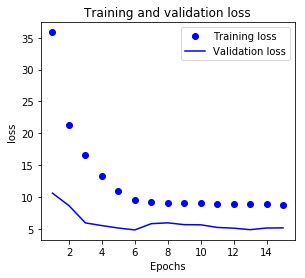


_____________________________________________________________________________________



In [99]:
for i, key in enumerate(model_list):
    print('Model '+str(i))
    display(nn_metrics.loc[i])
    validation_plots(model_dict['model' + str(i)])
    print('\n_____________________________________________________________________________________\n')

# validation_plots

# Create the Grid Search for best parameters

In [304]:
#Setting up the grid search#
regressor = KerasRegressor(build_fn = iter_ANN_prelu, batch_size=512, epochs=10)

layer_activation=['relu']
prelu_layers = [1,2,3]
non_prelu_layers = [0,1,2]
do=[[False, 0], [True, 0.1],[True, 0.3]]

# wgt_constraint=[1,2,3,4,5]
nodes=[20, 30]#1
wgt_init=['uniform','normal', 'zero']
#loss
optimizer=['adam']
loss=['mean_squared_error'] 



param_grid=dict(layer_activation=layer_activation, prelu_layers = prelu_layers, non_prelu_layers = non_prelu_layers, do=do, 
             nodes=nodes, wgt_init=wgt_init, 
               optimizer=optimizer, loss=loss)
parameters = param_grid

In [305]:
#############WARNING THIS TAKES LITERALLY FOREVER#############

#This tope code makes sure that keras runs all cores. 
import tensorflow as tf
from keras.backend import tensorflow_backend as K

with tf.Session(config=tf.ConfigProto(
                    intra_op_parallelism_threads=6)) as sess:
    K.set_session(sess)
    
#Make the grid search object
grid_search = GridSearchCV(estimator = regressor,
                       param_grid = parameters)

#Run it - note n_jobs = -1 ensures you use all cores on sklearn side. 

regressor_result = grid_search.fit(X_train, y_train, validation_data=(X_test, y_test), n_jobs = -1)

C:\Users\thomb\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`


Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 26s 33us/step - loss: 12.4573 - val_loss: 2.3378
Epoch 2/10
771598/771598 [==============================] - 12s 15us/step - loss: 1.7799 - val_loss: 1.4031
Epoch 3/10
771598/771598 [==============================] - 12s 15us/step - loss: 1.1870 - val_loss: 1.3501
Epoch 4/10
771598/771598 [==============================] - 12s 15us/step - loss: 0.9418 - val_loss: 0.8732
Epoch 5/10
771598/771598 [==============================] - 12s 15us/step - loss: 0.8143 - val_loss: 1.1038
Epoch 6/10
771598/771598 [==============================] - 12s 15us/step - loss: 0.7469 - val_loss: 0.7325
Epoch 7/10
771598/771598 [==============================] - 12s 16us/step - loss: 0.7028 - val_loss: 0.7163
Epoch 8/10
771598/771598 [==============================] - 13s 17us/step - loss: 0.6734 - val_loss: 0.6665
Epoch 9/10
771598/771598 [=======================

771598/771598 [==============================] - 13s 17us/step - loss: 0.8282 - val_loss: 0.8209
Epoch 8/10
771598/771598 [==============================] - 13s 17us/step - loss: 0.8014 - val_loss: 0.7943
Epoch 9/10
771598/771598 [==============================] - 13s 16us/step - loss: 0.7802 - val_loss: 0.7778
Epoch 10/10
771598/771598 [==============================] - 9s 11us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 17s 22us/step - loss: 12.3258 - val_loss: 3.4561
Epoch 2/10
771599/771599 [==============================] - 14s 18us/step - loss: 2.4035 - val_loss: 1.7573
Epoch 3/10
771599/771599 [==============================] - 14s 18us/step - loss: 1.3799 - val_loss: 1.1857
Epoch 4/10
771599/771599 [==============================] - 14s 18us/step - loss: 1.1171 - val_loss: 1.0758
Epoch 5/10
771599/771599 [==============================] - 16s 21us/step - loss: 1.0165 - val

Epoch 2/10
771599/771599 [==============================] - 14s 18us/step - loss: 143.9115 - val_loss: 128.7597
Epoch 3/10
771599/771599 [==============================] - 14s 18us/step - loss: 115.0265 - val_loss: 102.1459
Epoch 4/10
771599/771599 [==============================] - 14s 18us/step - loss: 90.5479 - val_loss: 79.7656
Epoch 5/10
771599/771599 [==============================] - 14s 18us/step - loss: 70.1931 - val_loss: 61.4211
Epoch 6/10
771599/771599 [==============================] - 14s 18us/step - loss: 53.7941 - val_loss: 46.9487
Epoch 7/10
771599/771599 [==============================] - 14s 18us/step - loss: 41.1932 - val_loss: 36.1921
Epoch 8/10
771599/771599 [==============================] - 14s 18us/step - loss: 32.1894 - val_loss: 28.8969
Epoch 9/10
771599/771599 [==============================] - 14s 18us/step - loss: 26.4710 - val_loss: 24.6823
Epoch 10/10
771599/771599 [==============================] - 9s 11us/step
Loss function: mean_squared_error
Train on

771599/771599 [==============================] - 18s 23us/step - loss: 1.0800 - val_loss: 1.0811
Epoch 9/10
771599/771599 [==============================] - 17s 22us/step - loss: 1.0445 - val_loss: 1.0329
Epoch 10/10
771599/771599 [==============================] - 11s 15us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 21s 28us/step - loss: 18.1144 - val_loss: 3.8035
Epoch 2/10
771599/771599 [==============================] - 16s 21us/step - loss: 3.0725 - val_loss: 2.4782
Epoch 3/10
771599/771599 [==============================] - 16s 21us/step - loss: 2.0164 - val_loss: 1.6629
Epoch 4/10
771599/771599 [==============================] - 16s 21us/step - loss: 1.4836 - val_loss: 1.3778
Epoch 5/10
771599/771599 [==============================] - 16s 21us/step - loss: 1.2963 - val_loss: 1.2286
Epoch 6/10
771599/771599 [==============================] - 17s 22us/step - loss: 1.1865 - va

771599/771599 [==============================] - 20s 26us/step - loss: 2.6226 - val_loss: 2.0619
Epoch 4/10
771599/771599 [==============================] - 20s 26us/step - loss: 1.8335 - val_loss: 1.6401
Epoch 5/10
771599/771599 [==============================] - 21s 27us/step - loss: 1.5111 - val_loss: 1.4390
Epoch 6/10
771599/771599 [==============================] - 20s 26us/step - loss: 1.3886 - val_loss: 1.3551
Epoch 7/10
771599/771599 [==============================] - 20s 26us/step - loss: 1.3001 - val_loss: 1.2701
Epoch 8/10
771599/771599 [==============================] - 20s 26us/step - loss: 1.2296 - val_loss: 1.2137
Epoch 9/10
771599/771599 [==============================] - 20s 26us/step - loss: 1.1649 - val_loss: 1.1454
Epoch 10/10
771599/771599 [==============================] - 13s 17us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 25s 33us/step - loss: 177.8672 - v

771599/771599 [==============================] - 15s 20us/step - loss: 26.5851 - val_loss: 24.6730
Epoch 10/10
771599/771599 [==============================] - 11s 14us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 21s 28us/step - loss: 20.4865 - val_loss: 5.3773
Epoch 2/10
771598/771598 [==============================] - 17s 22us/step - loss: 4.3340 - val_loss: 3.1130
Epoch 3/10
771598/771598 [==============================] - 17s 22us/step - loss: 2.3381 - val_loss: 1.8887
Epoch 4/10
771598/771598 [==============================] - 17s 22us/step - loss: 1.6872 - val_loss: 1.6018
Epoch 5/10
771598/771598 [==============================] - 17s 22us/step - loss: 1.5359 - val_loss: 1.4856
Epoch 6/10
771598/771598 [==============================] - 17s 22us/step - loss: 1.4462 - val_loss: 1.4230
Epoch 7/10
771598/771598 [==============================] - 17s 22us/step - loss: 1.3785 - 

771598/771598 [==============================] - 20s 26us/step - loss: 2.0477 - val_loss: 1.8379
Epoch 5/10
771598/771598 [==============================] - 20s 26us/step - loss: 1.6879 - val_loss: 1.6399
Epoch 6/10
771598/771598 [==============================] - 20s 26us/step - loss: 1.5663 - val_loss: 1.5264
Epoch 7/10
771598/771598 [==============================] - 20s 26us/step - loss: 1.4817 - val_loss: 1.4884
Epoch 8/10
771598/771598 [==============================] - 20s 26us/step - loss: 1.4217 - val_loss: 1.4027
Epoch 9/10
771598/771598 [==============================] - 20s 26us/step - loss: 1.3620 - val_loss: 1.3733
Epoch 10/10
771598/771598 [==============================] - 13s 17us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 26s 33us/step - loss: 23.6051 - val_loss: 5.2045
Epoch 2/10
771599/771599 [==============================] - 20s 26us/step - loss: 4.4880 - va

771598/771598 [==============================] - 13s 17us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 26s 34us/step - loss: 177.7852 - val_loss: 159.9972
Epoch 2/10
771599/771599 [==============================] - 20s 26us/step - loss: 143.9080 - val_loss: 128.7536
Epoch 3/10
771599/771599 [==============================] - 20s 26us/step - loss: 115.0218 - val_loss: 102.1429
Epoch 4/10
771599/771599 [==============================] - 21s 27us/step - loss: 90.5446 - val_loss: 79.7648
Epoch 5/10
771599/771599 [==============================] - 20s 26us/step - loss: 70.1920 - val_loss: 61.4158
Epoch 6/10
771599/771599 [==============================] - 20s 26us/step - loss: 53.7934 - val_loss: 46.9525
Epoch 7/10
771599/771599 [==============================] - 20s 26us/step - loss: 41.1918 - val_loss: 36.1865
Epoch 8/10
771599/771599 [==============================] - 20s 26us/step -

771599/771599 [==============================] - 27s 35us/step - loss: 1.3404 - val_loss: 1.2953
Epoch 6/10
771599/771599 [==============================] - 27s 35us/step - loss: 1.2417 - val_loss: 1.1890
Epoch 7/10
771599/771599 [==============================] - 27s 35us/step - loss: 1.1407 - val_loss: 1.2075
Epoch 8/10
771599/771599 [==============================] - 27s 35us/step - loss: 1.0854 - val_loss: 1.0666
Epoch 9/10
771599/771599 [==============================] - 27s 35us/step - loss: 1.0233 - val_loss: 1.0026
Epoch 10/10
771599/771599 [==============================] - 17s 22us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 34s 44us/step - loss: 14.9811 - val_loss: 4.3198
Epoch 2/10
771599/771599 [==============================] - 27s 35us/step - loss: 3.2281 - val_loss: 2.3388
Epoch 3/10
771599/771599 [==============================] - 27s 35us/step - loss: 1.8961 - va

771599/771599 [==============================] - 15s 20us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 32s 41us/step - loss: 12.4029 - val_loss: 3.4099
Epoch 2/10
771599/771599 [==============================] - 24s 31us/step - loss: 2.2411 - val_loss: 1.5143
Epoch 3/10
771599/771599 [==============================] - 24s 31us/step - loss: 1.3006 - val_loss: 1.2041
Epoch 4/10
771599/771599 [==============================] - 24s 31us/step - loss: 1.1178 - val_loss: 1.0605
Epoch 5/10
771599/771599 [==============================] - 24s 31us/step - loss: 1.0107 - val_loss: 0.9832
Epoch 6/10
771599/771599 [==============================] - 24s 31us/step - loss: 0.9403 - val_loss: 0.9160
Epoch 7/10
771599/771599 [==============================] - 24s 31us/step - loss: 0.8903 - val_loss: 0.8729
Epoch 8/10
771599/771599 [==============================] - 24s 31us/step - loss: 0.8528 - val

Epoch 3/10
771599/771599 [==============================] - 28s 37us/step - loss: 1.9303 - val_loss: 1.5409
Epoch 4/10
771599/771599 [==============================] - 28s 37us/step - loss: 1.3888 - val_loss: 1.3250
Epoch 5/10
771599/771599 [==============================] - 28s 37us/step - loss: 1.2687 - val_loss: 1.2330
Epoch 6/10
771599/771599 [==============================] - 28s 37us/step - loss: 1.1906 - val_loss: 1.1593
Epoch 7/10
771599/771599 [==============================] - 28s 37us/step - loss: 1.1198 - val_loss: 1.0817
Epoch 8/10
771599/771599 [==============================] - 28s 37us/step - loss: 1.0319 - val_loss: 1.0158
Epoch 9/10
771599/771599 [==============================] - 29s 38us/step - loss: 0.9856 - val_loss: 0.9793
Epoch 10/10
771599/771599 [==============================] - 18s 23us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 37s 48us/step - loss: 1

771599/771599 [==============================] - 36s 46us/step - loss: 1.2178 - val_loss: 1.2084
Epoch 10/10
771599/771599 [==============================] - 23s 29us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 45s 59us/step - loss: 177.8637 - val_loss: 160.0147
Epoch 2/10
771598/771598 [==============================] - 36s 47us/step - loss: 143.9835 - val_loss: 128.7626
Epoch 3/10
771598/771598 [==============================] - 36s 47us/step - loss: 115.0943 - val_loss: 102.1498
Epoch 4/10
771598/771598 [==============================] - 36s 47us/step - loss: 90.6143 - val_loss: 79.7689
Epoch 5/10
771598/771598 [==============================] - 36s 47us/step - loss: 70.2613 - val_loss: 61.4211
Epoch 6/10
771598/771598 [==============================] - 36s 47us/step - loss: 53.8616 - val_loss: 46.9546
Epoch 7/10
771598/771598 [==============================] - 37s 47us/step - 

Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 41s 53us/step - loss: 13.8936 - val_loss: 3.8849
Epoch 2/10
771598/771598 [==============================] - 31s 40us/step - loss: 2.6044 - val_loss: 1.8056
Epoch 3/10
771598/771598 [==============================] - 31s 40us/step - loss: 1.6086 - val_loss: 1.4981
Epoch 4/10
771598/771598 [==============================] - 31s 40us/step - loss: 1.4274 - val_loss: 1.3673
Epoch 5/10
771598/771598 [==============================] - 31s 40us/step - loss: 1.2957 - val_loss: 1.2449
Epoch 6/10
771598/771598 [==============================] - 31s 40us/step - loss: 1.1716 - val_loss: 1.1275
Epoch 7/10
771598/771598 [==============================] - 31s 40us/step - loss: 1.0845 - val_loss: 1.0636
Epoch 8/10
771598/771598 [==============================] - 31s 40us/step - loss: 1.0371 - val_loss: 1.0263
Epoch 9/10
771598/771598 [==============================] - 31s 40us/step - loss: 0

Epoch 7/10
771598/771598 [==============================] - 39s 50us/step - loss: 41.2547 - val_loss: 36.1913
Epoch 8/10
771598/771598 [==============================] - 39s 50us/step - loss: 32.2565 - val_loss: 28.8993
Epoch 9/10
771598/771598 [==============================] - 39s 50us/step - loss: 26.5368 - val_loss: 24.6825
Epoch 10/10
771598/771598 [==============================] - 23s 29us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 50s 65us/step - loss: 177.7723 - val_loss: 159.9798
Epoch 2/10
771599/771599 [==============================] - 39s 50us/step - loss: 143.8999 - val_loss: 128.7467
Epoch 3/10
771599/771599 [==============================] - 39s 51us/step - loss: 115.0198 - val_loss: 102.1408
Epoch 4/10
771599/771599 [==============================] - 39s 51us/step - loss: 90.5427 - val_loss: 79.7572
Epoch 5/10
771599/771599 [==============================] - 39s

771599/771599 [==============================] - 44s 57us/step - loss: 11.9813 - val_loss: 2.6210
Epoch 2/10
771599/771599 [==============================] - 32s 42us/step - loss: 3.2595 - val_loss: 1.4771
Epoch 3/10
771599/771599 [==============================] - 33s 42us/step - loss: 2.2919 - val_loss: 1.0879
Epoch 4/10
771599/771599 [==============================] - 33s 43us/step - loss: 1.9474 - val_loss: 0.8876
Epoch 5/10
771599/771599 [==============================] - 33s 43us/step - loss: 1.7507 - val_loss: 0.8010
Epoch 6/10
771599/771599 [==============================] - 33s 42us/step - loss: 1.5793 - val_loss: 0.7755
Epoch 7/10
771599/771599 [==============================] - 33s 43us/step - loss: 1.3788 - val_loss: 0.5573
Epoch 8/10
771599/771599 [==============================] - 34s 44us/step - loss: 1.1191 - val_loss: 0.4449
Epoch 9/10
771599/771599 [==============================] - 34s 44us/step - loss: 0.9775 - val_loss: 0.4008
Epoch 10/10
771599/771599 [===========

771599/771599 [==============================] - 40s 51us/step - loss: 2.0052 - val_loss: 0.8591
Epoch 8/10
771599/771599 [==============================] - 40s 51us/step - loss: 1.8073 - val_loss: 0.7523
Epoch 9/10
771599/771599 [==============================] - 40s 52us/step - loss: 1.6611 - val_loss: 0.6955
Epoch 10/10
771599/771599 [==============================] - 27s 35us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 56s 72us/step - loss: 16.3741 - val_loss: 4.0758
Epoch 2/10
771599/771599 [==============================] - 42s 55us/step - loss: 4.9389 - val_loss: 2.3537
Epoch 3/10
771599/771599 [==============================] - 42s 55us/step - loss: 3.3270 - val_loss: 1.5955
Epoch 4/10
771599/771599 [==============================] - 42s 55us/step - loss: 2.7732 - val_loss: 1.2898
Epoch 5/10
771599/771599 [==============================] - 43s 55us/step - loss: 2.4227 - va

771599/771599 [==============================] - 61s 80us/step - loss: 178.1268 - val_loss: 160.0103
Epoch 2/10
771599/771599 [==============================] - 46s 60us/step - loss: 144.2188 - val_loss: 128.7604
Epoch 3/10
771599/771599 [==============================] - 46s 60us/step - loss: 115.3031 - val_loss: 102.1481
Epoch 4/10
771599/771599 [==============================] - 46s 60us/step - loss: 90.7968 - val_loss: 79.7698
Epoch 5/10
771599/771599 [==============================] - 46s 60us/step - loss: 70.4124 - val_loss: 61.4144
Epoch 6/10
771599/771599 [==============================] - 46s 60us/step - loss: 53.9811 - val_loss: 46.9414
Epoch 7/10
771599/771599 [==============================] - 46s 60us/step - loss: 41.3577 - val_loss: 36.1863
Epoch 8/10
771599/771599 [==============================] - 47s 60us/step - loss: 32.3273 - val_loss: 28.8887
Epoch 9/10
771599/771599 [==============================] - 46s 60us/step - loss: 26.5878 - val_loss: 24.6737
Epoch 10/10
771

Epoch 5/10
771599/771599 [==============================] - 123s 160us/step - loss: 3.3636 - val_loss: 1.6385
Epoch 6/10
771599/771599 [==============================] - 99s 129us/step - loss: 3.0094 - val_loss: 1.4258
Epoch 7/10
771599/771599 [==============================] - 116s 151us/step - loss: 2.5735 - val_loss: 1.1372
Epoch 8/10
771599/771599 [==============================] - 101s 130us/step - loss: 2.2146 - val_loss: 1.0861
Epoch 9/10
771599/771599 [==============================] - 122s 159us/step - loss: 1.9796 - val_loss: 0.9572
Epoch 10/10
771599/771599 [==============================] - 74s 95us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 156s 202us/step - loss: 177.8452 - val_loss: 159.9948
Epoch 2/10
771598/771598 [==============================] - 121s 157us/step - loss: 143.9673 - val_loss: 128.7491
Epoch 3/10
771598/771598 [==============================] - 12

771599/771599 [==============================] - 101s 131us/step - loss: 26.5856 - val_loss: 24.6720
Epoch 10/10
771599/771599 [==============================] - 66s 85us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 138s 179us/step - loss: 30.3722 - val_loss: 4.6107
Epoch 2/10
771598/771598 [==============================] - 72s 94us/step - loss: 7.5073 - val_loss: 3.3809
Epoch 3/10
771598/771598 [==============================] - 61s 80us/step - loss: 6.0000 - val_loss: 2.6843
Epoch 4/10
771598/771598 [==============================] - 61s 80us/step - loss: 5.3427 - val_loss: 2.3440
Epoch 5/10
771598/771598 [==============================] - 61s 80us/step - loss: 4.9066 - val_loss: 2.2347
Epoch 6/10
771598/771598 [==============================] - 62s 81us/step - loss: 4.4263 - val_loss: 1.8853
Epoch 7/10
771598/771598 [==============================] - 62s 81us/step - loss: 3.944

771598/771598 [==============================] - 80s 104us/step - loss: 177.8762 - val_loss: 160.0250
Epoch 2/10
771598/771598 [==============================] - 61s 80us/step - loss: 143.9998 - val_loss: 128.7810
Epoch 3/10
771598/771598 [==============================] - 61s 79us/step - loss: 115.1100 - val_loss: 102.1601
Epoch 4/10
771598/771598 [==============================] - 61s 80us/step - loss: 90.6300 - val_loss: 79.7847
Epoch 5/10
771598/771598 [==============================] - 61s 80us/step - loss: 70.2690 - val_loss: 61.4273
Epoch 6/10
771598/771598 [==============================] - 62s 80us/step - loss: 53.8676 - val_loss: 46.9591
Epoch 7/10
771598/771598 [==============================] - 61s 79us/step - loss: 41.2645 - val_loss: 36.1930
Epoch 8/10
771598/771598 [==============================] - 61s 80us/step - loss: 32.2561 - val_loss: 28.9009
Epoch 9/10
771598/771598 [==============================] - 61s 80us/step - loss: 26.5390 - val_loss: 24.6839
Epoch 10/10
77

771598/771598 [==============================] - 58s 75us/step - loss: 4.8386 - val_loss: 2.6871
Epoch 8/10
771598/771598 [==============================] - 58s 75us/step - loss: 4.4389 - val_loss: 2.3172
Epoch 9/10
771598/771598 [==============================] - 58s 75us/step - loss: 4.0945 - val_loss: 2.1780
Epoch 10/10
771598/771598 [==============================] - 31s 40us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 77s 99us/step - loss: 24.4914 - val_loss: 4.9002
Epoch 2/10
771599/771599 [==============================] - 57s 74us/step - loss: 7.0051 - val_loss: 3.9196
Epoch 3/10
771599/771599 [==============================] - 58s 75us/step - loss: 5.9929 - val_loss: 3.3146
Epoch 4/10
771599/771599 [==============================] - 58s 75us/step - loss: 5.4207 - val_loss: 2.9048
Epoch 5/10
771599/771599 [==============================] - 57s 73us/step - loss: 4.9075 - va

771599/771599 [==============================] - 92s 119us/step - loss: 37.4602 - val_loss: 5.6723
Epoch 2/10
771599/771599 [==============================] - 65s 84us/step - loss: 10.6355 - val_loss: 4.3297
Epoch 3/10
771599/771599 [==============================] - 65s 84us/step - loss: 8.7470 - val_loss: 4.4971
Epoch 4/10
771599/771599 [==============================] - 65s 84us/step - loss: 8.2674 - val_loss: 3.9487
Epoch 5/10
771599/771599 [==============================] - 66s 85us/step - loss: 7.7226 - val_loss: 3.4813
Epoch 6/10
771599/771599 [==============================] - 65s 84us/step - loss: 7.1667 - val_loss: 3.2849
Epoch 7/10
771599/771599 [==============================] - 65s 84us/step - loss: 6.6364 - val_loss: 3.0261
Epoch 8/10
771599/771599 [==============================] - 65s 84us/step - loss: 6.1813 - val_loss: 3.0232
Epoch 9/10
771599/771599 [==============================] - 65s 84us/step - loss: 5.7875 - val_loss: 2.9543
Epoch 10/10
771599/771599 [=========

771599/771599 [==============================] - 52s 67us/step - loss: 41.1943 - val_loss: 36.1888
Epoch 8/10
771599/771599 [==============================] - 52s 67us/step - loss: 32.1867 - val_loss: 28.8982
Epoch 9/10
771599/771599 [==============================] - 52s 67us/step - loss: 26.4681 - val_loss: 24.6756
Epoch 10/10
771599/771599 [==============================] - 32s 41us/step
Loss function: mean_squared_error
Train on 771599 samples, validate on 128600 samples
Epoch 1/10
771599/771599 [==============================] - 75s 97us/step - loss: 178.1038 - val_loss: 159.9861
Epoch 2/10
771599/771599 [==============================] - 52s 68us/step - loss: 144.1953 - val_loss: 128.7349
Epoch 3/10
771599/771599 [==============================] - 53s 68us/step - loss: 115.2840 - val_loss: 102.1327
Epoch 4/10
771599/771599 [==============================] - 52s 68us/step - loss: 90.7812 - val_loss: 79.7514
Epoch 5/10
771599/771599 [==============================] - 52s 68us/step 

771599/771599 [==============================] - 108s 140us/step - loss: 20.8775 - val_loss: 5.3337
Epoch 2/10
771599/771599 [==============================] - 83s 108us/step - loss: 5.4112 - val_loss: 2.8477
Epoch 3/10
771599/771599 [==============================] - 83s 108us/step - loss: 3.8617 - val_loss: 2.4257
Epoch 4/10
771599/771599 [==============================] - 83s 108us/step - loss: 3.4712 - val_loss: 2.1012
Epoch 5/10
771599/771599 [==============================] - 83s 108us/step - loss: 3.1787 - val_loss: 1.7759
Epoch 6/10
771599/771599 [==============================] - 84s 108us/step - loss: 2.8079 - val_loss: 1.3916
Epoch 7/10
771599/771599 [==============================] - 83s 108us/step - loss: 2.4995 - val_loss: 1.2453
Epoch 8/10
771599/771599 [==============================] - 84s 108us/step - loss: 2.2900 - val_loss: 1.1626
Epoch 9/10
771599/771599 [==============================] - 83s 108us/step - loss: 2.1186 - val_loss: 1.0776
Epoch 10/10
771599/771599 [=

Epoch 4/10
771599/771599 [==============================] - 85s 110us/step - loss: 90.8010 - val_loss: 79.7711
Epoch 5/10
771599/771599 [==============================] - 85s 110us/step - loss: 70.4183 - val_loss: 61.4186
Epoch 6/10
771599/771599 [==============================] - 85s 110us/step - loss: 53.9849 - val_loss: 46.9442
Epoch 7/10
771599/771599 [==============================] - 85s 110us/step - loss: 41.3507 - val_loss: 36.1760
Epoch 8/10
771599/771599 [==============================] - 85s 110us/step - loss: 32.3193 - val_loss: 28.8841
Epoch 9/10
771599/771599 [==============================] - 85s 110us/step - loss: 26.5840 - val_loss: 24.6701
Epoch 10/10
771599/771599 [==============================] - 41s 53us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 91s 119us/step - loss: 15.3011 - val_loss: 4.1864
Epoch 2/10
771598/771598 [==============================] - 66s

Epoch 10/10
771599/771599 [==============================] - 38s 49us/step
Loss function: mean_squared_error
Train on 771598 samples, validate on 128600 samples
Epoch 1/10
771598/771598 [==============================] - 129s 168us/step - loss: 18.8758 - val_loss: 6.0570
Epoch 2/10
771598/771598 [==============================] - 94s 122us/step - loss: 7.1631 - val_loss: 3.7910
Epoch 3/10
771598/771598 [==============================] - 93s 120us/step - loss: 4.9254 - val_loss: 2.7485
Epoch 4/10
771598/771598 [==============================] - 102s 132us/step - loss: 4.2125 - val_loss: 2.2971
Epoch 5/10
771598/771598 [==============================] - 103s 134us/step - loss: 3.8261 - val_loss: 2.0626
Epoch 6/10
771598/771598 [==============================] - 103s 133us/step - loss: 3.4437 - val_loss: 1.7815
Epoch 7/10
771598/771598 [==============================] - 102s 132us/step - loss: 3.0673 - val_loss: 1.5945
Epoch 8/10
771598/771598 [==============================] - 102s 132us

KeyboardInterrupt: 

In [306]:
#Save the grid search results. Not tested since the grid search never finished. 
pickle.dump(regressor_result, open('D:/ML Case Study/lending-club/gridsearchCV_results.p','wb'))

NameError: name 'regressor_result' is not defined

In [55]:
predictions = model.predict(X_test)

In [57]:
r2_score(y_test, predictions)  

0.96999114782044793

In [110]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [112]:
#Gradient Boosted Tree without grade and sub-grade
grad_model = GradientBoostingRegressor()
grad_model_hist = grad_model.fit(X_train, y_train)

In [113]:
#Gradient Boosted Tree Metrics without grade and sub-grade. 
grad_pred = grad_model_hist.predict(X_test)
print('R2 is: ', r2_score(y_test, grad_pred))
print('MSE is:', mean_squared_error(y_test, grad_pred))

R2 is:  0.64288672015
MSE is: 8.01733836742


In [114]:
#Feature importance dataframe from the gradient boosted tree without grade and subgrade. 
grad_features=pd.DataFrame({'feat_score':grad_model.feature_importances_, 'columns': col_names}).sort_values(by='feat_score', ascending = False)
grad_features

,columns,feat_score
1,installment,0.159929
0,loan_amnt,0.081189
354,term_36,0.054869
15,total_rec_prncp,0.050211
29,bc_open_to_buy,0.047106
5,inq_last_6mths,0.044352
63,average_fico,0.043216
64,dti_final,0.041320
50,num_tl_op_past_12m,0.038178
10,total_acc,0.035583


In [111]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, ada_pred)

In [61]:
grad_model = GradientBoostingRegressor()
grad_model_hist = grad_model.fit(X_train, y_train)

In [64]:
#Gradient Boosted Tree
grad_pred = grad_model_hist.predict(X_test)
print('R2 is: ', r2_score(y_test, grad_pred))
print('MSE is:', mean_squared_error(y_test, grad_pred))

R2 is:  0.97998429316
MSE is: 0.448876801253


In [74]:
grad_features=pd.DataFrame({'feat_score':grad_model.feature_importances_, 'columns': col_names}).sort_values(by='feat_score', ascending = False)
grad_features

,columns,feat_score
67,grade_A,0.121174
2,sub_grade,0.099989
71,grade_E,0.082811
72,grade_F,0.080437
68,grade_B,0.079938
73,grade_G,0.069139
242,mths_since_rcnt_il_cat_Not Reported,0.040754
70,grade_D,0.022437
69,grade_C,0.020738
97,issue_d_Dec-2015,0.019895


In [67]:
grad_model.feature_importances_

array([ 0.        ,  0.        ,  0.09998885,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00257181,  0.01036794,  0.        ,
        0.        ,  0.01812335,  0.00452129,  0.        ,  0.        ,
        0.        ,  0.00041165,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00026932,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.12117436,  0.0799377 ,  0.02

In [58]:
for i in col_names:
    print(i)

loan_amnt
installment
sub_grade
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankruptcies
tax_liens
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
sec_app_fico_best
annual_inc_final
earliest_cr_line_months
emp_length_floats
average_fico
dt

In [256]:
#####OLD FORMAT WITHOUT LAYER BUILDING 
from keras.layers.advanced_activations import PReLU

def iter_ANN_prelu(inputs = X_train.shape[1],
             lasso_p = .1,
             ridge_p = .1,
             layer_activation = 'relu',
             nodes = 30, #25 best so far
             do = .1, #.1 best so far
             num_layers = 4, #3 best so far
             output_activation = None, #Reformat
             optimizer = 'adam',
             loss = 'mean_squared_error',        #Reformatted
             metrics = None):
    
    # Set up Sequential ANN and Input Layer
    model = Sequential()
    model.add(Dense(nodes, input_shape=(inputs,)))
    #Define the 'prelu'
    act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
    
    model.add(Dense(nodes, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p)))
    #add PreLU
    model.add(act)
    model.add(Dropout(do))
    model.add(Dense(nodes, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p))) #
    #add PreLU
    model.add(act)
    model.add(Dropout(do))                       
    model.add(Dense(nodes, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p),
                 activation = layer_activation))
    model.add(Dropout(do))
    
    # Set Up Output Layer 
    #model.add(Flatten())
    model.add(Dense(1, activation = output_activation))
    
    model.compile(optimizer = optimizer,
                           loss = loss)
    print("Loss function: " + model.loss)
    return model